# Bayesian networks example


In [44]:
from problog import get_evaluatable
from problog.program import PrologString
from problog.formula import LogicFormula, LogicDAG
from problog.ddnnf_formula import DDNNF
from problog.cnf_formula import CNF
from problog.bdd_formula import BDD
import timeit
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import re
import networkx as nx

In [45]:
with open('model3.pl') as model:
    m = model.read()

In [46]:
lfs = []
dags = []
cnfs = []

In [47]:
times = []
door_num = range(1, 2)
for i in door_num:
    start = timeit.default_timer()
    model = m
    p = PrologString(model)
    formula = get_evaluatable().create_from(p)
    print(formula.evaluate())
    stop = timeit.default_timer()
    times.append(stop - start)

{alarm: 0.9169960474308301}


In [48]:
for i in door_num:
    model = m.format(door_num=i)
    p = PrologString(model)
    lf = LogicFormula.create_from(p)
    lfs.append(lf)
    dag = LogicDAG.create_from(lf)
    dags.append(dag)
    cnf = CNF.create_from(dag)
    cnfs.append(cnf)
    ddnnf = DDNNF.create_from(cnf)
    print(ddnnf.evaluate())
    ddnnf.

{alarm: 0.9169960474308301}


In [52]:
ddnf=str(ddnnf)
print(ddnnf)

1: atom(identifier=10, probability=0.9, group=None, name=choice(7,0,alarm), source=None)
2: disj(children=(-1, 1), name=None)
3: atom(identifier=4, probability=0.8, group=None, name=choice(18,0,alarm), source=None)
4: disj(children=(3, -3), name=None)
5: atom(identifier=5, probability=True, group=None, name=None, source=None)
6: atom(identifier=3, probability=True, group=None, name=None, source=None)
7: atom(identifier=1, probability=0.7, group=None, name=burglary, source=None)
8: atom(identifier=11, probability=True, group=None, name=None, source=None)
9: atom(identifier=9, probability=True, group=None, name=None, source=None)
10: atom(identifier=2, probability=0.2, group=None, name=earthquake, source=None)
11: atom(identifier=6, probability=True, group=None, name=None, source=None)
12: atom(identifier=14, probability=True, group=None, name=None, source=None)
13: atom(identifier=12, probability=True, group=None, name=alarm, source=None)
14: atom(identifier=8, probability=True, group=N

In [50]:
print(lfs[0])

1: atom(identifier=3, probability=0.7, group=None, name=burglary, source=None)
2: atom(identifier=5, probability=0.2, group=None, name=earthquake, source=None)
3: conj(children=(1, 2), name=None)
4: atom(identifier=(7, () {{}}, 0), probability=0.9, group=(7, () {{}}), name=choice(7,0,alarm), source=None)
5: conj(children=(3, 4), name=None)
6: conj(children=(1, -2), name=None)
7: atom(identifier=(18, () {{}}, 0), probability=0.8, group=(18, () {{}}), name=choice(18,0,alarm), source=None)
8: conj(children=(6, 7), name=None)
9: conj(children=(2, -1), name=None)
10: atom(identifier=(29, () {{}}, 0), probability=0.1, group=(29, () {{}}), name=choice(29,0,alarm), source=None)
11: conj(children=(9, 10), name=None)
12: disj(children=(8, 11, 5), name=alarm)
13: atom(identifier=(40, (john,) {{}}, 0), probability=0.8, group=(40, (john,) {{}}), name=choice(40,0,calls(john),john), source=None)
14: conj(children=(12, 13), name=None)
15: atom(identifier=(51, (john,) {{}}, 0), probability=0.1, group=(

In [51]:
print(dags[0])

1: atom(identifier=3, probability=0.7, group=None, name=burglary, source=None)
2: atom(identifier=5, probability=0.2, group=None, name=earthquake, source=None)
3: conj(children=(1, -2), name=None)
4: atom(identifier=(18, () {{}}, 0), probability=0.8, group=(18, () {{}}), name=choice(18,0,alarm), source=None)
5: conj(children=(3, 4), name=None)
6: conj(children=(2, -1), name=None)
7: atom(identifier=(29, () {{}}, 0), probability=0.1, group=(29, () {{}}), name=choice(29,0,alarm), source=None)
8: conj(children=(6, 7), name=None)
9: conj(children=(1, 2), name=None)
10: atom(identifier=(7, () {{}}, 0), probability=0.9, group=(7, () {{}}), name=choice(7,0,alarm), source=None)
11: conj(children=(9, 10), name=None)
12: disj(children=(8, 11, 5), name=alarm)
13: atom(identifier=(51, (john,) {{}}, 0), probability=0.1, group=(51, (john,) {{}}), name=choice(51,0,calls(john),john), source=None)
14: conj(children=(-12, 13), name=None)
15: atom(identifier=(40, (john,) {{}}, 0), probability=0.8, group=

In [17]:
print(cnfs[0])

In [53]:
lfs_str = '''1: atom(identifier=10, probability=0.9, group=None, name=choice(7,0,alarm), source=None)
2: disj(children=(-1, 1), name=None)
3: atom(identifier=4, probability=0.8, group=None, name=choice(18,0,alarm), source=None)
4: disj(children=(3, -3), name=None)
5: atom(identifier=5, probability=True, group=None, name=None, source=None)
6: atom(identifier=3, probability=True, group=None, name=None, source=None)
7: atom(identifier=1, probability=0.7, group=None, name=burglary, source=None)
8: atom(identifier=11, probability=True, group=None, name=None, source=None)
9: atom(identifier=9, probability=True, group=None, name=None, source=None)
10: atom(identifier=2, probability=0.2, group=None, name=earthquake, source=None)
11: atom(identifier=6, probability=True, group=None, name=None, source=None)
12: atom(identifier=14, probability=True, group=None, name=None, source=None)
13: atom(identifier=12, probability=True, group=None, name=alarm, source=None)
14: atom(identifier=8, probability=True, group=None, name=None, source=None)
15: atom(identifier=7, probability=0.1, group=None, name=choice(29,0,alarm), source=None)
16: atom(identifier=15, probability=0.8, group=None, name=choice(40,0,calls(john),john), source=None)
17: atom(identifier=16, probability=True, group=None, name=None, source=None)
18: atom(identifier=17, probability=True, group=None, name=calls(john), source=None)
19: conj(children=(-16, -17, -18), name=None)
20: conj(children=(17, 16, 18), name=None)
21: disj(children=(19, 20), name=None)
22: conj(children=(10, 11, -12, 13, 14, 15, 21), name=None)
23: atom(identifier=13, probability=0.1, group=None, name=choice(51,0,calls(john),john), source=None)
24: disj(children=(-23, 23), name=None)
25: conj(children=(22, 24), name=None)
26: conj(children=(-23, -12, -18), name=None)
27: conj(children=(12, 23, 18), name=None)
28: disj(children=(26, 27), name=None)
29: conj(children=(10, 11, -15), name=None)
30: conj(children=(-10, -11), name=None)
31: disj(children=(15, -15), name=None)
32: conj(children=(30, 31), name=None)
33: disj(children=(29, 32), name=None)
34: conj(children=(-13, -14, -17, 28, 33), name=None)
35: disj(children=(-16, 16), name=None)
36: conj(children=(34, 35), name=None)
37: disj(children=(25, 36), name=None)
38: conj(children=(-5, -6, -7, -8, -9, 37), name=None)
39: conj(children=(2, 4, 38), name=None)
40: disj(children=(15, -15), name=None)
41: disj(children=(-16, 16), name=None)
42: conj(children=(-10, -3, 6, -9), name=None)
43: disj(children=(-1, 1), name=None)
44: conj(children=(42, 43), name=None)
45: conj(children=(10, -6, -1, 9), name=None)
46: disj(children=(3, -3), name=None)
47: conj(children=(45, 46), name=None)
48: disj(children=(44, 47), name=None)
49: conj(children=(-5, -13, -8, -17, 28, 48), name=None)
50: conj(children=(41, 49), name=None)
51: conj(children=(10, -5, -6, 9, 8, 1), name=None)
52: disj(children=(3, -3), name=None)
53: conj(children=(51, 52), name=None)
54: conj(children=(-10, 5, 3, 6, -8, -9), name=None)
55: disj(children=(-1, 1), name=None)
56: conj(children=(54, 55), name=None)
57: disj(children=(53, 56), name=None)
58: conj(children=(-12, 13, 21, 57), name=None)
59: disj(children=(-23, 23), name=None)
60: conj(children=(58, 59), name=None)
61: disj(children=(50, 60), name=None)
62: conj(children=(-11, 7, -14, 61), name=None)
63: conj(children=(40, 62), name=None)
64: disj(children=(39, 63), name=None)'''

In [54]:
lfs_list = lfs_str.split('\n')
lfs_row_id = [row.split(':') for row in lfs_list]
for row in lfs_row_id:
    row[0] = int(row[0])
child_list = []
for row in lfs_row_id:
    if re.search('children', row[1]):
        children = re.findall(r'\d+', row[1])
        child_list.append([row[0],children])

In [55]:
edges = []
for row in child_list:
    for child in row[1]:
        edges.append((str(row[0]),child))
edges        

[('2', '1'),
 ('2', '1'),
 ('4', '3'),
 ('4', '3'),
 ('19', '16'),
 ('19', '17'),
 ('19', '18'),
 ('20', '17'),
 ('20', '16'),
 ('20', '18'),
 ('21', '19'),
 ('21', '20'),
 ('22', '10'),
 ('22', '11'),
 ('22', '12'),
 ('22', '13'),
 ('22', '14'),
 ('22', '15'),
 ('22', '21'),
 ('24', '23'),
 ('24', '23'),
 ('25', '22'),
 ('25', '24'),
 ('26', '23'),
 ('26', '12'),
 ('26', '18'),
 ('27', '12'),
 ('27', '23'),
 ('27', '18'),
 ('28', '26'),
 ('28', '27'),
 ('29', '10'),
 ('29', '11'),
 ('29', '15'),
 ('30', '10'),
 ('30', '11'),
 ('31', '15'),
 ('31', '15'),
 ('32', '30'),
 ('32', '31'),
 ('33', '29'),
 ('33', '32'),
 ('34', '13'),
 ('34', '14'),
 ('34', '17'),
 ('34', '28'),
 ('34', '33'),
 ('35', '16'),
 ('35', '16'),
 ('36', '34'),
 ('36', '35'),
 ('37', '25'),
 ('37', '36'),
 ('38', '5'),
 ('38', '6'),
 ('38', '7'),
 ('38', '8'),
 ('38', '9'),
 ('38', '37'),
 ('39', '2'),
 ('39', '4'),
 ('39', '38'),
 ('40', '15'),
 ('40', '15'),
 ('41', '16'),
 ('41', '16'),
 ('42', '10'),
 ('42', '3

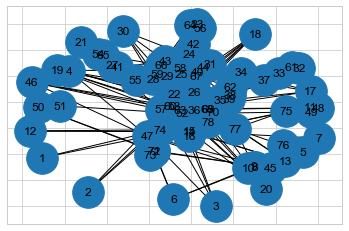

In [21]:
G = nx.DiGraph()
G.add_edges_from(edges)

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

In [56]:
from graphviz import Digraph

g = Digraph('G', filename='likes(john,tom) example.gv')

for e in edges:
    g.edge(e[0],e[1])

for node in lfs_row_id: 
    type = node[1].split('(')[0]
    if node[1].split('name=')[1].split(', source=')[0] == 'None)':
        label =type + str(node[0])
    else:
        label =type + f'{node[0]}:{node[1].split("name=")[1].split(", source=")[0]}'    
    g.node(str(node[0]),label=label)

g.view()

'likes(john,tom) example.gv.pdf'

In [31]:
lfs_row_id[1]

' atom'